In [1]:
#charger le fichier csv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"Student_Performance.csv")

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Valeurs manqunates

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isna()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [7]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

# Valeurs dupliquées

In [8]:
(df[df.duplicated()])

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [9]:
condition = (df['Hours Studied'] == 9) & (df['Previous Scores'] == 52) & (df['Extracurricular Activities']=='No') & (df['Sleep Hours']==5)

In [10]:
df[condition]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
202,9,52,No,5,9,48.0
915,9,52,No,5,9,48.0


On remarque qu'il y a 127 lignes dupliquées , mais c'est pas un probleme car il peut y avoir deux etudiants ayant ls memes caracteristiques .

# Valeurs categrorielle --> valeurs numeriques

In [11]:
# rendre Yes : 1  et No : 0

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()

In [14]:
extra_activ=encoder.fit_transform(df['Extracurricular Activities'])

In [15]:
extra_activ

array([1, 0, 1, ..., 1, 1, 0])

In [16]:
encoder.classes_

array(['No', 'Yes'], dtype=object)

In [17]:
for i in encoder.classes_:
    print(i,' : ',encoder.transform([i]))

No  :  [0]
Yes  :  [1]


In [18]:
df['Extracurricular Activities']= extra_activ

In [19]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


# Afficher quelques statistiques

Afficher un diagramme circulaire pour voir le pourcentage des personnes pratiquants les activités extrascolaires et celles qui ne le font pas

In [20]:
import matplotlib.pyplot as plt

In [21]:
plt.figure(figsize=(6, 6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [22]:
count = [df[df['Extracurricular Activities']==i].shape[0] for i in df['Extracurricular Activities'].unique()]

In [23]:
count

[4948, 5052]

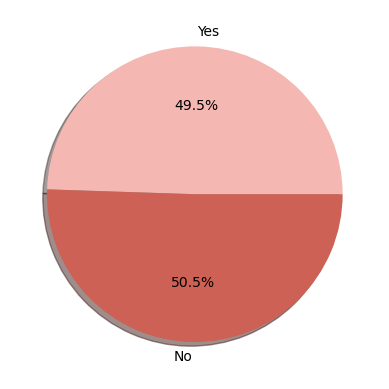

In [24]:
plt.pie(count,labels=['Yes','No'],autopct = "%1.1f%%",shadow = True,colors=['#f5b7b1','#cd6155'])
plt.show()

On remarque que le pourcentage d'etudiants pratiquants les activites extrascorlaire > ceux non

In [25]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [26]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


# Afficher countplot pour Sleep Hours

<Axes: xlabel='Sleep Hours', ylabel='count'>

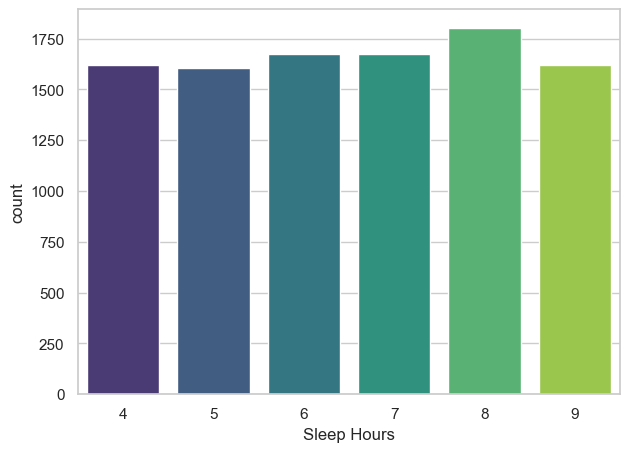

In [27]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.countplot(x="Sleep Hours",data=df, palette="viridis")


La plupart dorment 8 heures

# Diagramme a barres

In [28]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


calculer la somme des previous scores pour chaque valeur de "Hours studied"

In [29]:
df_groupby= pd.concat([df['Hours Studied'],df['Previous Scores']],axis=1)

In [30]:
df_groupby

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75
...,...,...
9995,1,49
9996,7,64
9997,6,83
9998,9,97


In [45]:
moy = df_groupby.groupby(df_groupby['Hours Studied']).mean().reset_index()

In [46]:
moy

,Hours Studied,Previous Scores
0,1,69.641493
1,2,69.264516
2,3,69.689008
3,4,69.813825
4,5,69.723035
5,6,69.878199
6,7,68.677591
7,8,69.955882
8,9,68.385650


In [47]:
plt.figure(figsize=(7,6))

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

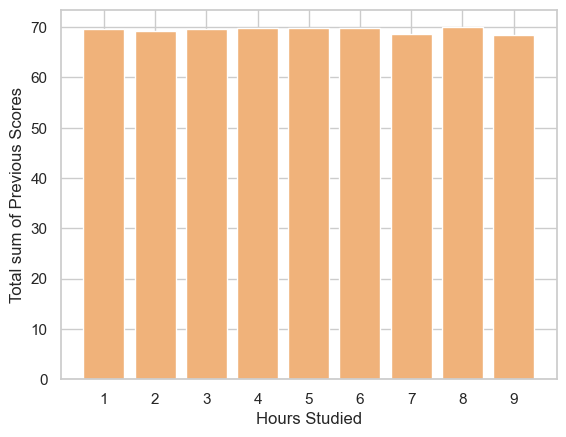

In [52]:
import numpy as np
plt.bar(moy['Hours Studied'], moy['Previous Scores'], color='#f0b27a')
plt.xlabel('Hours Studied')
plt.ylabel('Total sum of Previous Scores')
plt.xticks(np.arange(1,10,1))

# Affichage du graphique
plt.show()

# Boxplot Previous scores

<Axes: xlabel='Previous Scores'>

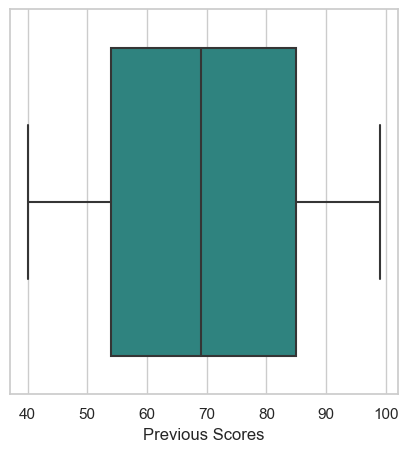

In [35]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.boxplot(x="Previous Scores",data=df, palette="viridis")

plus de 50% d'etudiants ont un score de plus de 68

# Diagramme a barres 

### Esque les activités extra scolaires affectent elles les resultats des etudiants (Les scores finales) ????

In [36]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [37]:
df_group=pd.concat([df['Extracurricular Activities'],df['Previous Scores']],axis=1)

In [38]:
df_group

,Extracurricular Activities,Previous Scores
0,1,99
1,0,82
2,1,51
3,1,52
4,0,75
...,...,...
9995,1,49
9996,1,64
9997,1,83
9998,1,97


In [49]:
mean = df_group.groupby(df_group['Extracurricular Activities']).mean().reset_index()

In [50]:
mean

,Extracurricular Activities,Previous Scores
0,0,69.302059
1,1,69.592361


In [51]:
plt.figure(figsize=(4,7))

<Figure size 400x700 with 0 Axes>

<Figure size 400x700 with 0 Axes>

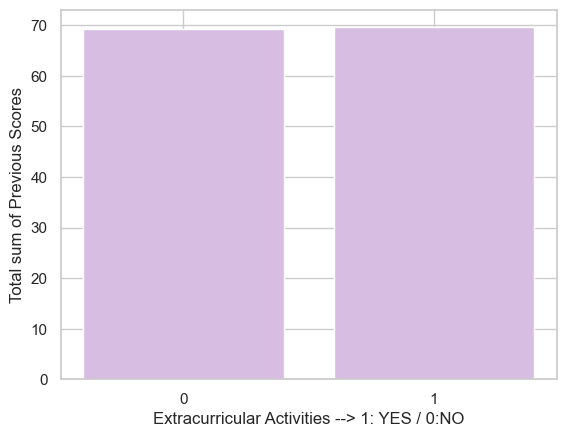

In [54]:
plt.bar(mean['Extracurricular Activities'], mean['Previous Scores'], color='#d7bde2')
plt.xlabel('Extracurricular Activities --> 1: YES / 0:NO')
plt.ylabel('Total sum of Previous Scores')
plt.xticks(np.arange(0,2,1))

# Affichage du graphique
plt.show()

Les personnes pratiquant les activités extra scolaire ont presque le meme score que ceux non , du coup ca n affecte pas

# linePlot

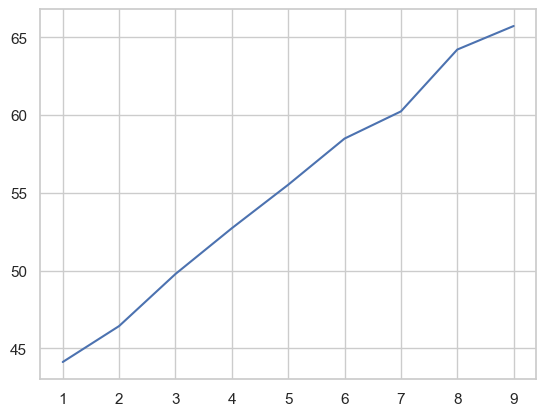

In [43]:
avg_performance_by_hours = df.groupby(df['Hours Studied'])['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

Plus les heures de revisions augmente plus la performence de l etudiant augmente

# C'est le moment d'appliquer la regression linéaire

In [55]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [58]:
X = df.iloc[:,:-1]

In [59]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [73]:
Y = df.iloc[:,-1]

In [74]:
Y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [75]:
#choissir des données de test au hasard et le reste c'est des données d'entrainement
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2) #20% des données c.a.d 10 données sont utilisé comme test

In [77]:
Y_test

2989    70.0
3164    58.0
8663    20.0
6038    57.0
1908    28.0
        ... 
9884    48.0
234     92.0
9079    63.0
2093    83.0
3124    66.0
Name: Performance Index, Length: 2000, dtype: float64

In [78]:
Y_train

2614    63.0
3701    70.0
6297    24.0
9320    43.0
3930    49.0
        ... 
8334    81.0
1933    41.0
8873    31.0
1770    58.0
3328    75.0
Name: Performance Index, Length: 8000, dtype: float64

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
reg = LinearRegression()

In [81]:
reg.fit(X_train,Y_train)

LinearRegression()

In [82]:
Y_pred=reg.predict(X_test)

In [83]:
Y_pred

array([70.12665634, 59.79106157, 19.29278995, ..., 63.16594144,
       80.91918715, 69.32601388])

In [84]:
data = pd.DataFrame({'Real_Values':Y_test,'Predicted_Values':Y_pred})

In [85]:
data

,Real_Values,Predicted_Values
2989,70.0,70.126656
3164,58.0,59.791062
8663,20.0,19.292790
6038,57.0,55.519734
1908,28.0,31.566273
...,...,...
9884,48.0,46.491016
234,92.0,91.250554
9079,63.0,63.165941
2093,83.0,80.919187


In [86]:
# RMSE : Erreur quadratique moyenne racine
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

2.0232039051931165

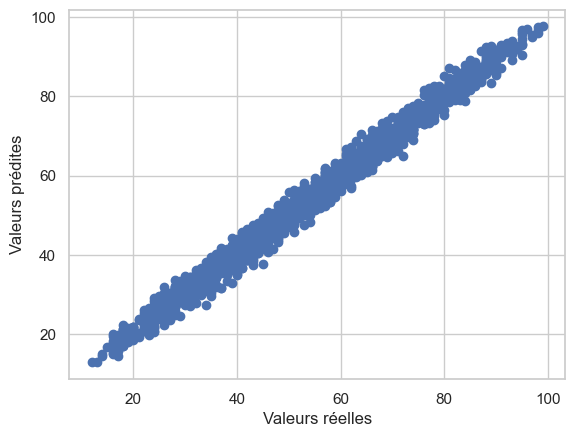

In [98]:
# Create scatter plot to see distribution

plt.scatter(Y_test,Y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.show()

In [96]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(Y_test,Y_pred)

1.591356292186265

Si le modèle de prédiction est parfait, tous les points devraient se situer sur une ligne droite diagonale, car chaque valeur prédite (Y_pred) serait égale à la valeur réelle (Y_test). Si les points s'écartent de cette ligne, cela indique des écarts entre les valeurs réelles et les valeurs prédites, ce qui peut montrer l'erreur de prédiction du modèle.